In [10]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import Counter
import pandas as pd

In [2]:
class Event:
    def __init__(self, field_names, values):
        if len(field_names) != len(values):
            raise ValueError(f"The data is corrupted!\n"
                             f"The number of field names does not match the number of values.\n"
                             f"{len(field_names)}/{len(values)}\n"
                             f"{field_names}/{values}")
            
        for key, value in zip(field_names, values):
            setattr(self, key, value)
    def get_value(self, key):
        return getattr(self,key)

In [3]:
class user:
    def __init__(self):
        pass

In [4]:
def load_text_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

In [5]:
def load_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        csv_reader = csv.reader(file)
        text_array = [list(map(str.strip, line)) for line in csv_reader]
    return text_array[0],text_array[1:]

file_path = 'E://AppMetrica-data//test.csv'
name,text_array = load_text_file(file_path)

In [6]:
print(name)
print(text_array[0])

['event_json', 'event_name', 'app_version_name', 'os_version', 'event_datetime']
['{"SugarAds":"342"}', 'Ads', '5.0.17', '8.1.0', '2024-04-13 20:59:09']


In [7]:
events=[]

for i in text_array[0:100]:
    events.append(Event(name,i))

In [8]:
for i in events[0:19]:
    print(i.get_value(name[1]))

Ads
Meta
2Tropics
2Tropics
Ads
Meta
2Tropics
3Semidesert
3Semidesert
3Semidesert
3Semidesert
3Semidesert
3Semidesert
3Semidesert
3Semidesert
3Semidesert
3Semidesert
3Semidesert
Ads


In [ ]:
event_types = [i.get_value(name[1]) for i in events]
event_count = Counter(event_types)

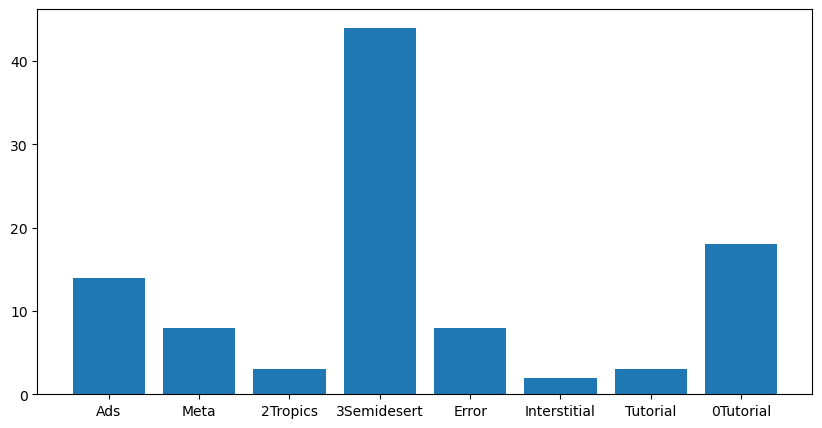

In [9]:
types = list(event_count.keys()) 
counts = list(event_count.values()) 

plt.figure(figsize=(10, 5))
plt.bar(types, counts)  
plt.show()


In [16]:
df = pd.DataFrame(list(event_count.items()), columns=['Event Type', 'Count'])
df

,Event Type,Count
0,Ads,14
1,Meta,8
2,2Tropics,3
3,3Semidesert,44
4,Error,8
5,Interstitial,2
6,Tutorial,3
7,0Tutorial,18
